In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
def meanX(dataX): return np.mean(dataX,axis=0)

In [5]:
def variance(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    variance = 1./m * np.diag(X1.T * X1)
    return variance

In [6]:
def normalize(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    X2 = np.tile(np.diag(X.T * X), (m, 1))
    XNorm = X1/X2
    return XNorm

In [8]:
def pca(XMat, k):
    average = meanX(XMat) 
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)
    featValue, featVec=  np.linalg.eig(covX) 
    index = np.argsort(-featValue) 
    finalData = []
    if k > n:
        print("k must lower than feature number")
        return
    else:
        selectVec = np.matrix(featVec.T[index[:k]])
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  
    return finalData, reconData

In [9]:
def loaddata(datafile):
    return np.array(pd.read_csv(datafile,sep="\t",header=-1)).astype(np.float)

In [10]:
def plotBestFit(data1, data2):
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0]) 
        axis_y2.append(dataArr2[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1'); plt.ylabel('x2');
    plt.savefig("outfile.png")
    plt.show()
def test():
    X = [[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
         [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]]
    XMat = np.matrix(X).T  
    k = 2
    return pca(XMat, k)

def main():    
    datafile = "data.txt"
    XMat = loaddata(datafile)
    k = 2
    return pca(XMat, k)

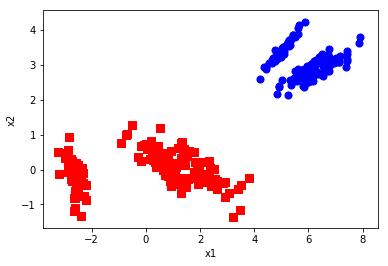

In [12]:
if __name__ == "__main__":
    finalData, reconMat = main()
    plotBestFit(finalData, reconMat)